In [2]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet, Swish, MonomialNN
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
import math
from neurodiffeq.monitors import Monitor1D
import IPython

In [3]:
alpha0 = 2
alpha1 = 1
C0 = -alpha0/(alpha1)
C1 = 2
C2 = 3
C3 = 4
C4 = 5
gamma = 1

In [4]:
N = 100000
# t_start = 1.2046056046056046
t_start = 0.0000001
t_end = 1
t = np.linspace(t_end, t_start, N)
# U0 = 0.0000001
# U0dash = 1

U0 = 1 - C0/12 - C1 + C2
U0dash = -C0/6 + C1 - 2*C2

In [5]:
# Initial conditions
h = t[1]-t[0]

# Enter the definition of the set of ordinary differential equations
def ode(t,y,u):
  ode_1 = u
  ode_2 = -(u**2)/(2*y) + 5*u*(y-1/15)/(y*t) + (-12*y*gamma + t**2)*(y-1/3)/(2*y*gamma*(t**2))
  return np.array([ode_1,ode_2])

# RK4
y = np.empty(N); u = np.empty(N)

# t[0] = t_initial
y[0] = U0; u[0] = U0dash

for i in range(0,N-1,1):

  k11 = h*ode(t[i],y[i],u[i])[0]
  k12 = h*ode(t[i],y[i],u[i])[1]

  k21 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[0]
  k22 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[1]

  k31 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[0]
  k32 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[1]

  k41 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[0]
  k42 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[1]

  y[i+1] = y[i] + ((k11+2*k21+2*k31+k41)/6)
  u[i+1] = u[i] + ((k12+2*k22+2*k32+k42)/6)
  # t[i+1] = t[i] + h

In [6]:
B_rk4 = y

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
    
# Initial conditions

# Enter the definition of the set of ordinary differential equations
def f(t,A,Adash):
    ode = -(Adash**2)/(2*A) + 5*Adash*(A-1/15)/(A*t) + (-12*A*gamma + t**2)*(A-1/3)/(2*A*gamma*(t**2))
    return ode

# RK4
A = np.empty(N); Adash = np.empty(N)

# t[0] = t_initial
A[0] = U0; Adash[0] = U0dash

for i in range(0,N-1,1):
    Adashdash_i = f(t[i],A[i],Adash[i])
    Adashdash_i_plus_1 = f(t[i+1],A[i]+h*Adash[i],Adash[i]+h*Adashdash_i)

    Adash[i+1] = Adash[i] + 0.5*h*(Adashdash_i+Adashdash_i_plus_1)
    A[i+1] = A[i] + 0.5*h*(Adash[i] + Adash[i+1])



In [8]:
B_tp = A

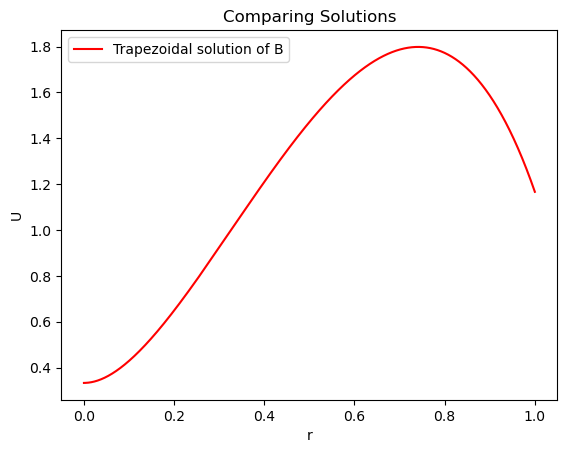

In [9]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t, B_tp - t**2, label='Trapezoidal solution of B', color = 'r')
# plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'b')
plt.legend()
plt.savefig('lambda')
plt.show()

In [10]:
import copy

# Enter the definition of the set of ordinary differential equations
def f(t,A,Adash):
    ode = -(Adash**2)/(2*A) + 5*Adash*(A-1/15)/(A*t) + (-12*A*gamma + t**2)*(A-1/3)/(2*A*gamma*(t**2))
    return ode

# RK4
# B = A; Bdash = Adash

B = copy.deepcopy(A)
Bdash = copy.deepcopy(Adash)


for i in range(0,N-1,1):
    B[i+1] = B[i] + h*(1.5*Bdash[i] - 0.5*Bdash[i-1])
    Bdash[i+1] = Bdash[i] + h*(1.5*f(t[i],B[i],Bdash[i])-0.5*f(t[i-1],B[i-1],Bdash[i-1]))
    # B[i+3] = B[i+2] + h*(23*Bdash[i+2]/12 - 16*Bdash[i+1]/12 + 5*Bdash[i]/12)
    # Bdash[i+3] = Bdash[i+2] + h*(23*f(t[i+2],B[i+2],Bdash[i+2])/12 - 16*f(t[i+1],B[i+1],Bdash[i+1])/12 + 5*f(t[i],B[i],Bdash[i])/12)

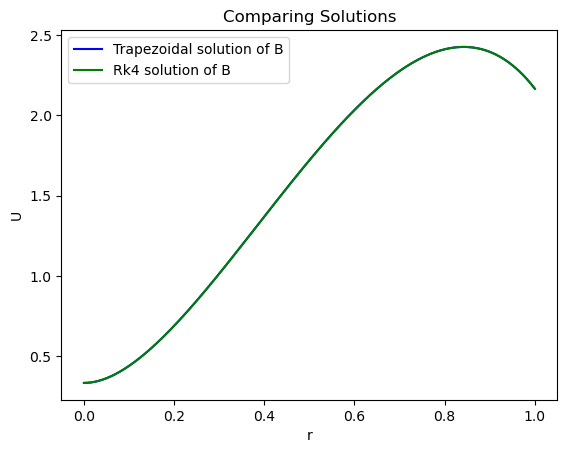

In [11]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
plt.legend()
plt.savefig('lambda')
plt.show()

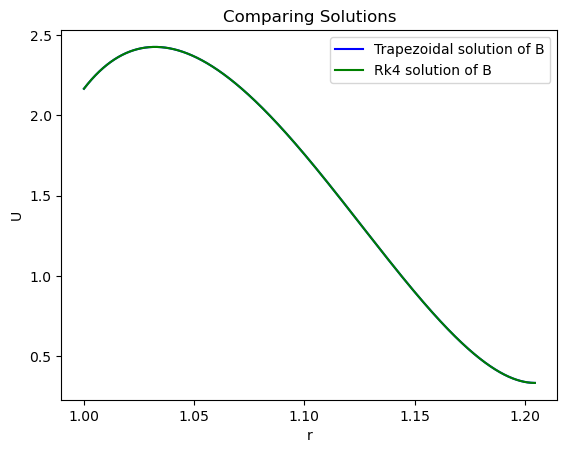

In [45]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
# plt.axis([1.20, 1.30, -1000000, 1000000])
plt.legend()
plt.savefig('lambda')
plt.show()

In [13]:
print(U0,U0dash,C0)

2.166666666666667 -3.6666666666666665 -2.0


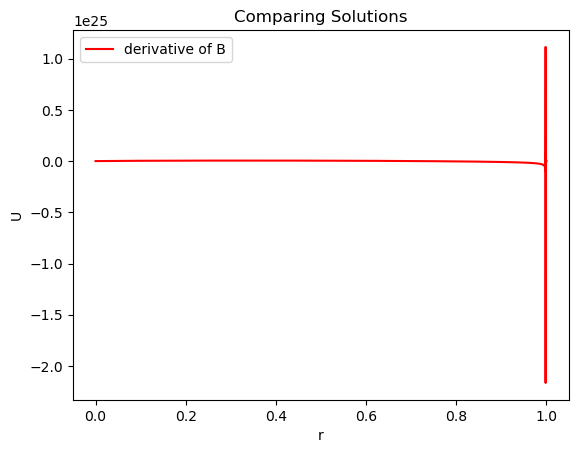

In [14]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t, Bdash, label='derivative of B', color = 'r')
plt.legend()
plt.savefig('lambda')
plt.show()

In [15]:
index_min = min(range(len(B_tp)), key=B_tp.__getitem__)
print(index_min)
print(t[index_min])

99999
1e-07


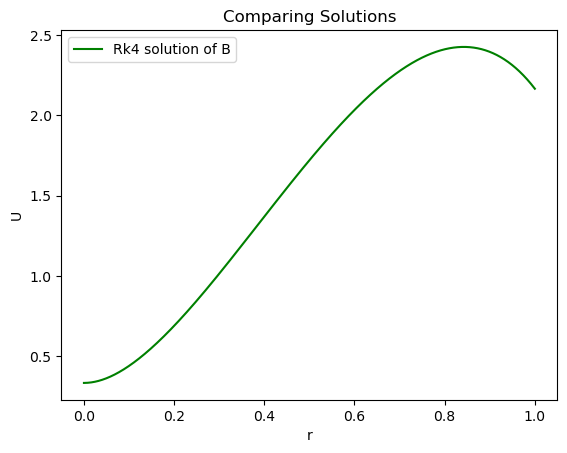

In [16]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
# plt.plot(t, B, label='multistep solution of B', color = 'r')
# plt.plot(t, B_tp,label='Trapezoidal solution of B', color = 'b')
plt.plot(t, B_rk4,label='Rk4 solution of B', color = 'g')
plt.legend()
plt.savefig('lambda')
plt.show()

In [17]:
from scipy.io import savemat
import numpy as np
mdic = {"B": B_rk4, "t": t}
savemat("matlab_matrix.mat", mdic)

In [18]:
mdic

{'B': array([2.16666667, 2.16670333, 2.16673999, ..., 0.33333334, 0.33333333,
        0.33333333]),
 't': array([1.0000000e+00, 9.9999000e-01, 9.9998000e-01, ..., 2.0100198e-05,
        1.0100099e-05, 1.0000000e-07])}

In [19]:
B_modified = B_rk4 - t**2

In [20]:
from scipy.io import savemat
import numpy as np
mdic = {"B1": B_modified, "t1": t}
savemat("matlab_matrix1.mat", mdic)

In [21]:
t_new = np.linspace(0.1, 1.0, N)
B_modified = -3.9376*t_new**5 + 9.8846*t_new**4 - 15.0665*t_new**3 + 9.7957*t_new**2 + 0.1611*t_new + 0.3303

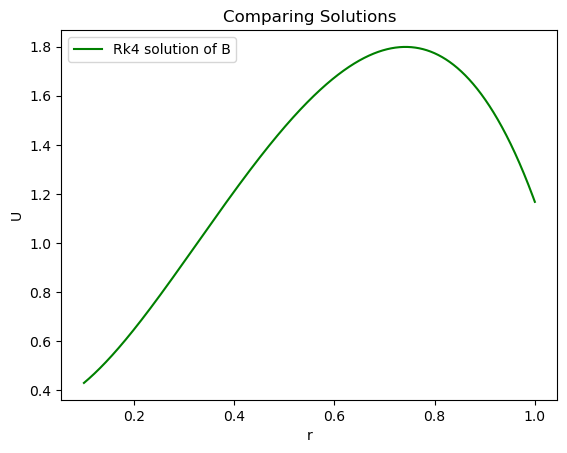

In [22]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t_new, B_modified,label='Rk4 solution of B', color = 'g')
plt.legend()
plt.savefig('lambda')
plt.show()

In [23]:
1.2046055146055146

1.2046055146055146

In [24]:
itemindex = np.where(t_new == 1.2046055146055146)

In [25]:
itemindex

(array([], dtype=int64),)

In [26]:
t_new

array([0.1     , 0.100009, 0.100018, ..., 0.999982, 0.999991, 1.      ])

In [27]:
itemindex = np.where(np.isclose(t_new, 1.2046055146055146, 0.000005))
itemindex

(array([], dtype=int64),)

In [28]:
B_modified[92050]

1.4940082300585544

In [29]:
N = 100000
# t_start = 1.2046056046056046
t_start = 1
t_end = 1.2046056046056046
t = np.linspace(t_start, t_end, N)
# U0 = 0.0000001
# U0dash = 1

U0 = 1 - C0/12 - C1 + C2
U0dash = -C0/6 + C1 - 2*C2

In [30]:
# Initial conditions
h = t[1]-t[0]

# Enter the definition of the set of ordinary differential equations
def ode(t,y,u):
  ode_1 = u
  ode_2 = -(u**2)/(2*y) + 5*u*(y-1/15)/(y*t) + (-12*y*gamma + t**2)*(y-1/3)/(2*y*gamma*(t**2))
  return np.array([ode_1,ode_2])

# RK4
y = np.empty(N); u = np.empty(N)

# t[0] = t_initial
y[0] = U0; u[0] = U0dash

for i in range(0,N-1,1):

  k11 = h*ode(t[i],y[i],u[i])[0]
  k12 = h*ode(t[i],y[i],u[i])[1]

  k21 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[0]
  k22 = h*ode(t[i]+(h/2),y[i]+(k11/2),u[i]+(k12/2))[1]

  k31 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[0]
  k32 = h*ode(t[i]+(h/2),y[i]+(k21/2),u[i]+(k22/2))[1]

  k41 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[0]
  k42 = h*ode(t[i]+h,y[i]+k31,u[i]+k32)[1]

  y[i+1] = y[i] + ((k11+2*k21+2*k31+k41)/6)
  u[i+1] = u[i] + ((k12+2*k22+2*k32+k42)/6)
  # t[i+1] = t[i] + h

In [31]:
Brk4_2 = y

In [32]:
Brk4_3 = np.concatenate((B_rk4[::-1], Brk4_2), axis=0)

In [33]:
t_total = np.linspace(0.0000001, 1.2046056046056046, 2*N)

In [34]:
B_modified = -3.9376*t_total**5 + 9.8846*t_total**4 - 15.0665*t_total**3 + 9.7957*t_total**2 + 0.1611*t_total + 0.3303

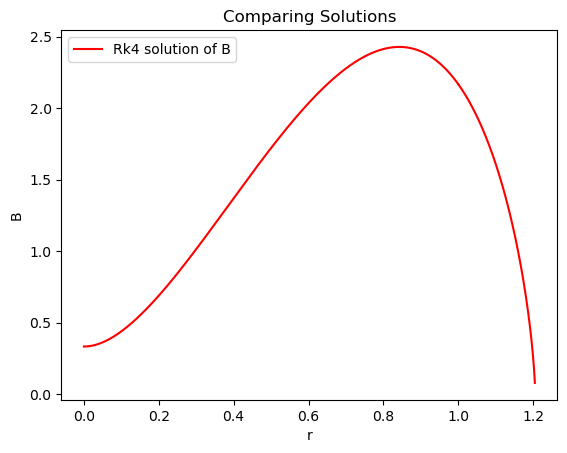

In [35]:
plt.title("Comparing Solutions")
plt.ylabel('B')
plt.xlabel('r')
# plt.plot(t_total, Brk4_3,label='Rk4 solution of B', color = 'g')
plt.plot(np.linspace(0.0000001, 1, N), B_rk4[::-1], color = 'r')
plt.plot(np.linspace(1,1.2046056046056046, N), Brk4_2,label='Rk4 solution of B', color = 'r')
# plt.plot(t_total, B_modified,label='Rk4 solution of B', color = 'g')
# plt.axis([0.5, 0.7, 2.1, 2.2])
plt.legend()
plt.savefig('lambda')
plt.show()

In [36]:
Brk4_3 = np.concatenate((B_rk4[::-1], Brk4_2), axis=0)
t_total = np.concatenate((np.linspace(0.0000001, 1, N), np.linspace(1,1.2046056046056046, N)), axis=0)

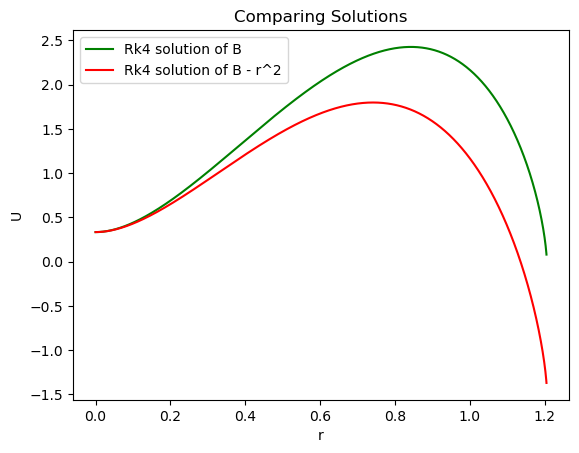

In [37]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t_total, Brk4_3,label='Rk4 solution of B', color = 'g')
plt.plot(t_total, Brk4_3 - t_total**2,label='Rk4 solution of B - r^2', color = 'r')
# plt.axis([0.5, 0.7, 2.1, 2.2])
plt.legend()
plt.savefig('lambda')
plt.show()

In [38]:
from scipy.io import savemat
import numpy as np
mdic = {"B": Brk4_3, "r": t_total}
savemat("matlab_matrix.mat", mdic)

mdic = {"B1": Brk4_3 - t_total**2, "t1": t_total}
savemat("matlab_matrix1.mat", mdic)

In [39]:
Brk4_2

array([2.16666667, 2.16665916, 2.16665166, ..., 0.07913967, 0.07902566,
       0.07891157])

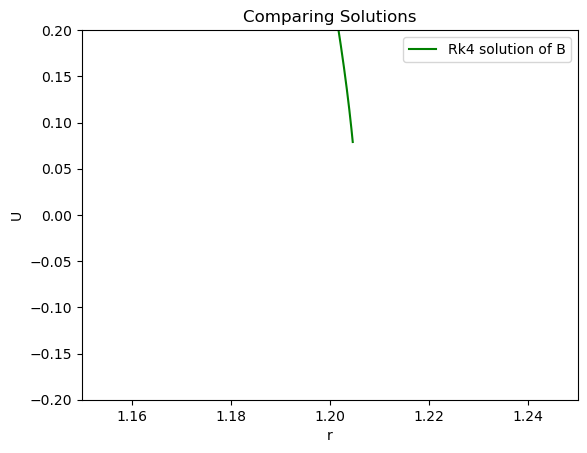

In [40]:
plt.title("Comparing Solutions")
plt.ylabel('U')
plt.xlabel('r')
plt.plot(t, Brk4_2,label='Rk4 solution of B', color = 'g')
plt.axis([1.15, 1.25, -0.2, 0.2])
plt.legend()
plt.savefig('lambda')
plt.show()

In [41]:
itemindex = np.where(np.isclose(Brk4_2, 0 ,1 ))
itemindex

(array([], dtype=int64),)

In [42]:
Brk4_2[0]

2.166666666666667

In [43]:
itemindex = np.where(np.isclose(Brk4_2, 1.2046056046056046 ,1 ))
itemindex

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

In [44]:
Brk4_3[0]

0.3333333295828328